# Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Using TensorFlow backend.


## Data Preparation


In [3]:
Ravdess = "C:/Users/prane/Downloads/archive4/audio_speech_actors_01-24/"
Crema = "C:/Users/prane/Downloads/archive2/AudioWAV/"
Tess = "C:/Users/prane/Downloads/archive3/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "C:/Users/prane/Downloads/archive1/ALL/"

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,angry,/kaggle/input/ravdess-emotional-speech-audio/a...
2,calm,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,sad,/kaggle/input/ravdess-emotional-speech-audio/a...


In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:

    file_path.append(Crema + file)
 
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,/kaggle/input/cremad/AudioWAV/1049_WSI_ANG_XX.wav
1,angry,/kaggle/input/cremad/AudioWAV/1082_IWW_ANG_XX.wav
2,fear,/kaggle/input/cremad/AudioWAV/1021_ITS_FEA_XX.wav
3,angry,/kaggle/input/cremad/AudioWAV/1086_ITS_ANG_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1026_ITS_DIS_XX.wav


In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,sad,/kaggle/input/toronto-emotional-speech-set-tes...
1,sad,/kaggle/input/toronto-emotional-speech-set-tes...
2,sad,/kaggle/input/toronto-emotional-speech-set-tes...
3,sad,/kaggle/input/toronto-emotional-speech-set-tes...
4,sad,/kaggle/input/toronto-emotional-speech-set-tes...


In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,surprise,/kaggle/input/surrey-audiovisual-expressed-emo...
1,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
2,neutral,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...


In [8]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,angry,/kaggle/input/ravdess-emotional-speech-audio/a...
2,calm,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,sad,/kaggle/input/ravdess-emotional-speech-audio/a...


## Data Visualisation and Exploration

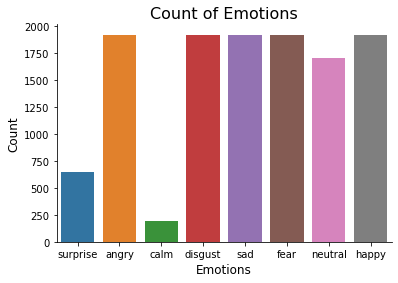

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [15]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [21]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) 
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result

In [22]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [23]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [24]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.185239,0.585543,0.541992,0.555859,0.615102,0.599604,0.652054,0.691854,0.766230,0.791168,...,0.002888,0.001964,0.001590,0.002071,0.002255,0.002727,0.001520,0.000461,0.000038,surprise
1,0.302097,0.748427,0.716290,0.740596,0.802801,0.760048,0.693101,0.699719,0.734826,0.753985,...,0.003670,0.002759,0.002363,0.003003,0.003083,0.003557,0.002395,0.001345,0.000886,surprise
2,0.147298,0.646143,0.595935,0.561826,0.547853,0.612391,0.561209,0.622703,0.689758,0.756473,...,0.001020,0.000665,0.000617,0.000406,0.000478,0.000603,0.000401,0.000094,0.000007,surprise
3,0.199350,0.517106,0.521565,0.508298,0.564973,0.626469,0.698655,0.668579,0.603630,0.621905,...,0.052493,0.048467,0.046119,0.036382,0.041288,0.027275,0.024452,0.006556,0.000462,angry
4,0.296762,0.653405,0.640598,0.633179,0.681640,0.741104,0.730206,0.660096,0.651581,0.663689,...,0.083794,0.079053,0.073813,0.065715,0.066659,0.054817,0.055254,0.036077,0.028982,angry


## Data Preparation



In [43]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [44]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [45]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [46]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [47]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

## Modelling

In [59]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 81, 256)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 41, 256)           0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 21, 128)           0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 21, 128)          

In [60]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Train on 27364 samples, validate on 9122 samples
Epoch 1/50
27364/27364 [==============================] - 5s 183us/step - loss: 1.6819 - accuracy: 0.3212 - val_loss: 1.4272 - val_accuracy: 0.4257
Epoch 2/50
27364/27364 [==============================] - 4s 163us/step - loss: 1.4340 - accuracy: 0.4279 - val_loss: 1.2990 - val_accuracy: 0.4752
Epoch 3/50
27364/27364 [==============================] - 4s 161us/step - loss: 1.3356 - accuracy: 0.4637 - val_loss: 1.2498 - val_accuracy: 0.5007
Epoch 4/50
27364/27364 [==============================] - 5s 168us/step - loss: 1.2843 - accuracy: 0.4928 - val_loss: 1.2138 - val_accuracy: 0.5027
Epoch 5/50
27364/27364 [==============================] - 4s 157us/step - loss: 1.2453 - accuracy: 0.5074 - val_loss: 1.1987 - val_accuracy: 0.5180
Epoch 6/50
27364/27364 [==============================] - 4s 163us/step - loss: 1.2134 - accuracy: 0.5164 - val_loss: 1.1540 - val_accuracy: 0.5406
Epoch 7/50
27364/27364 [==============================] - 4s 16

9122/9122 [==============================] - 1s 92us/step
Accuracy of our model on test data :  60.74326038360596 %


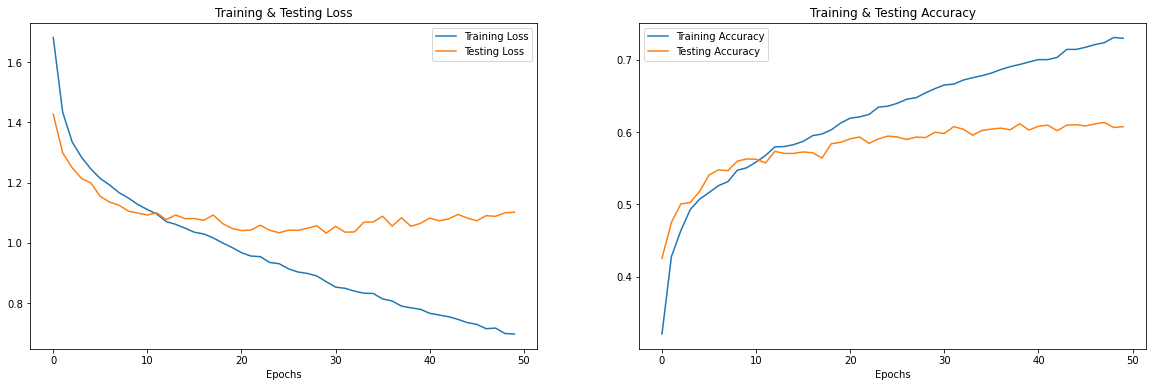

In [61]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [62]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [63]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,neutral,disgust
1,sad,sad
2,sad,sad
3,fear,disgust
4,happy,happy
5,sad,fear
6,disgust,sad
7,happy,happy
8,angry,happy
9,happy,happy


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.78      0.69      0.73      1396
        calm       0.62      0.86      0.72       142
     disgust       0.54      0.48      0.51      1461
        fear       0.63      0.51      0.57      1443
       happy       0.53      0.62      0.57      1450
     neutral       0.55      0.57      0.56      1265
         sad       0.58      0.68      0.62      1470
    surprise       0.85      0.79      0.82       495

    accuracy                           0.61      9122
   macro avg       0.63      0.65      0.64      9122
weighted avg       0.61      0.61      0.61      9122

